In [14]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

In [10]:
def load_all_pkl(directories):
    data = {}
    for directory in directories:
        for subdir in ['FSC', 'SFD']:
            path = os.path.join(directory, subdir)
            for filename in os.listdir(path):
                if filename.endswith('.pkl'):
                    with open(os.path.join(path, filename), 'rb') as f:
                        key = f"{directory}_{subdir}_{filename}"
                        data[key] = pickle.load(f)
    return data

directories = ['DIGITS', 'MNIST_USPS', 'Office-31', 'Yale']
data = load_all_pkl(directories)
data["DIGITS_FSC_post_attack_res.pkl"]

{0: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.3143879173290938],
  'NMI': [0.5629242217550571, 0.5629242217550572, 0.5629242217550572]},
 1: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34561704652440606, 0.34536878163927076],
  'ACC': [0.3143879173290938, 0.3143879173290938, 0.30961844197138316],
  'NMI': [0.5629242217550572, 0.5629242217550572, 0.5697589524611093]},
 2: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34536878163927076, 0.34536878163927076],
  'ACC': [0.3143879173290938, 0.30961844197138316, 0.30961844197138316],
  'NMI': [0.5629242217550572, 0.5697589524611093, 0.5697589524611093]},
 3: {'BALANCE': [0, 0, 0],
  'ENTROPY': [0.34561704652440606, 0.34536878163927076, 0.34561704652440606],
  'ACC': [0.3143879173290938, 0.30961844197138316, 0.3143879173290938],
  'NMI': [0.5629242217550572, 0.5697589524611093, 0.5629242217550572]},
 4: 

In [25]:
mean_std_data = {}
for key, value in data.items():
    mean_std_data[key] = {}
    for subkey, subvalue in value.items():
        mean_std_data[key][subkey] = {metric: (np.mean(values), np.std(values)) for metric, values in subvalue.items()}
mean_std_data.keys()

dict_keys(['DIGITS_FSC_post_attack_res.pkl', 'DIGITS_FSC_pre_attack_res.pkl', 'DIGITS_FSC_random_attack_res.pkl', 'DIGITS_SFD_post_attack_res.pkl', 'DIGITS_SFD_pre_attack_res.pkl', 'DIGITS_SFD_random_attack_res.pkl', 'MNIST_USPS_FSC_post_attack_res.pkl', 'MNIST_USPS_FSC_pre_attack_res.pkl', 'MNIST_USPS_FSC_random_attack_res.pkl', 'MNIST_USPS_SFD_post_attack_res.pkl', 'MNIST_USPS_SFD_pre_attack_res.pkl', 'MNIST_USPS_SFD_random_attack_res.pkl', 'Office-31_FSC_post_attack_res.pkl', 'Office-31_FSC_pre_attack_res.pkl', 'Office-31_FSC_random_attack_res.pkl', 'Office-31_SFD_post_attack_res.pkl', 'Office-31_SFD_pre_attack_res.pkl', 'Office-31_SFD_random_attack_res.pkl', 'Yale_FSC_post_attack_res.pkl', 'Yale_FSC_pre_attack_res.pkl', 'Yale_FSC_random_attack_res.pkl', 'Yale_SFD_post_attack_res.pkl', 'Yale_SFD_pre_attack_res.pkl', 'Yale_SFD_random_attack_res.pkl'])

C:\Users\Idries\AppData\Local\Temp\ipykernel_16508\471795044.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  lines = [Line2D([0], [0], color=plt.cm.get_cmap('tab10')(i), linewidth=2, linestyle=line_styles[i]) for i in range(len(attacks))]


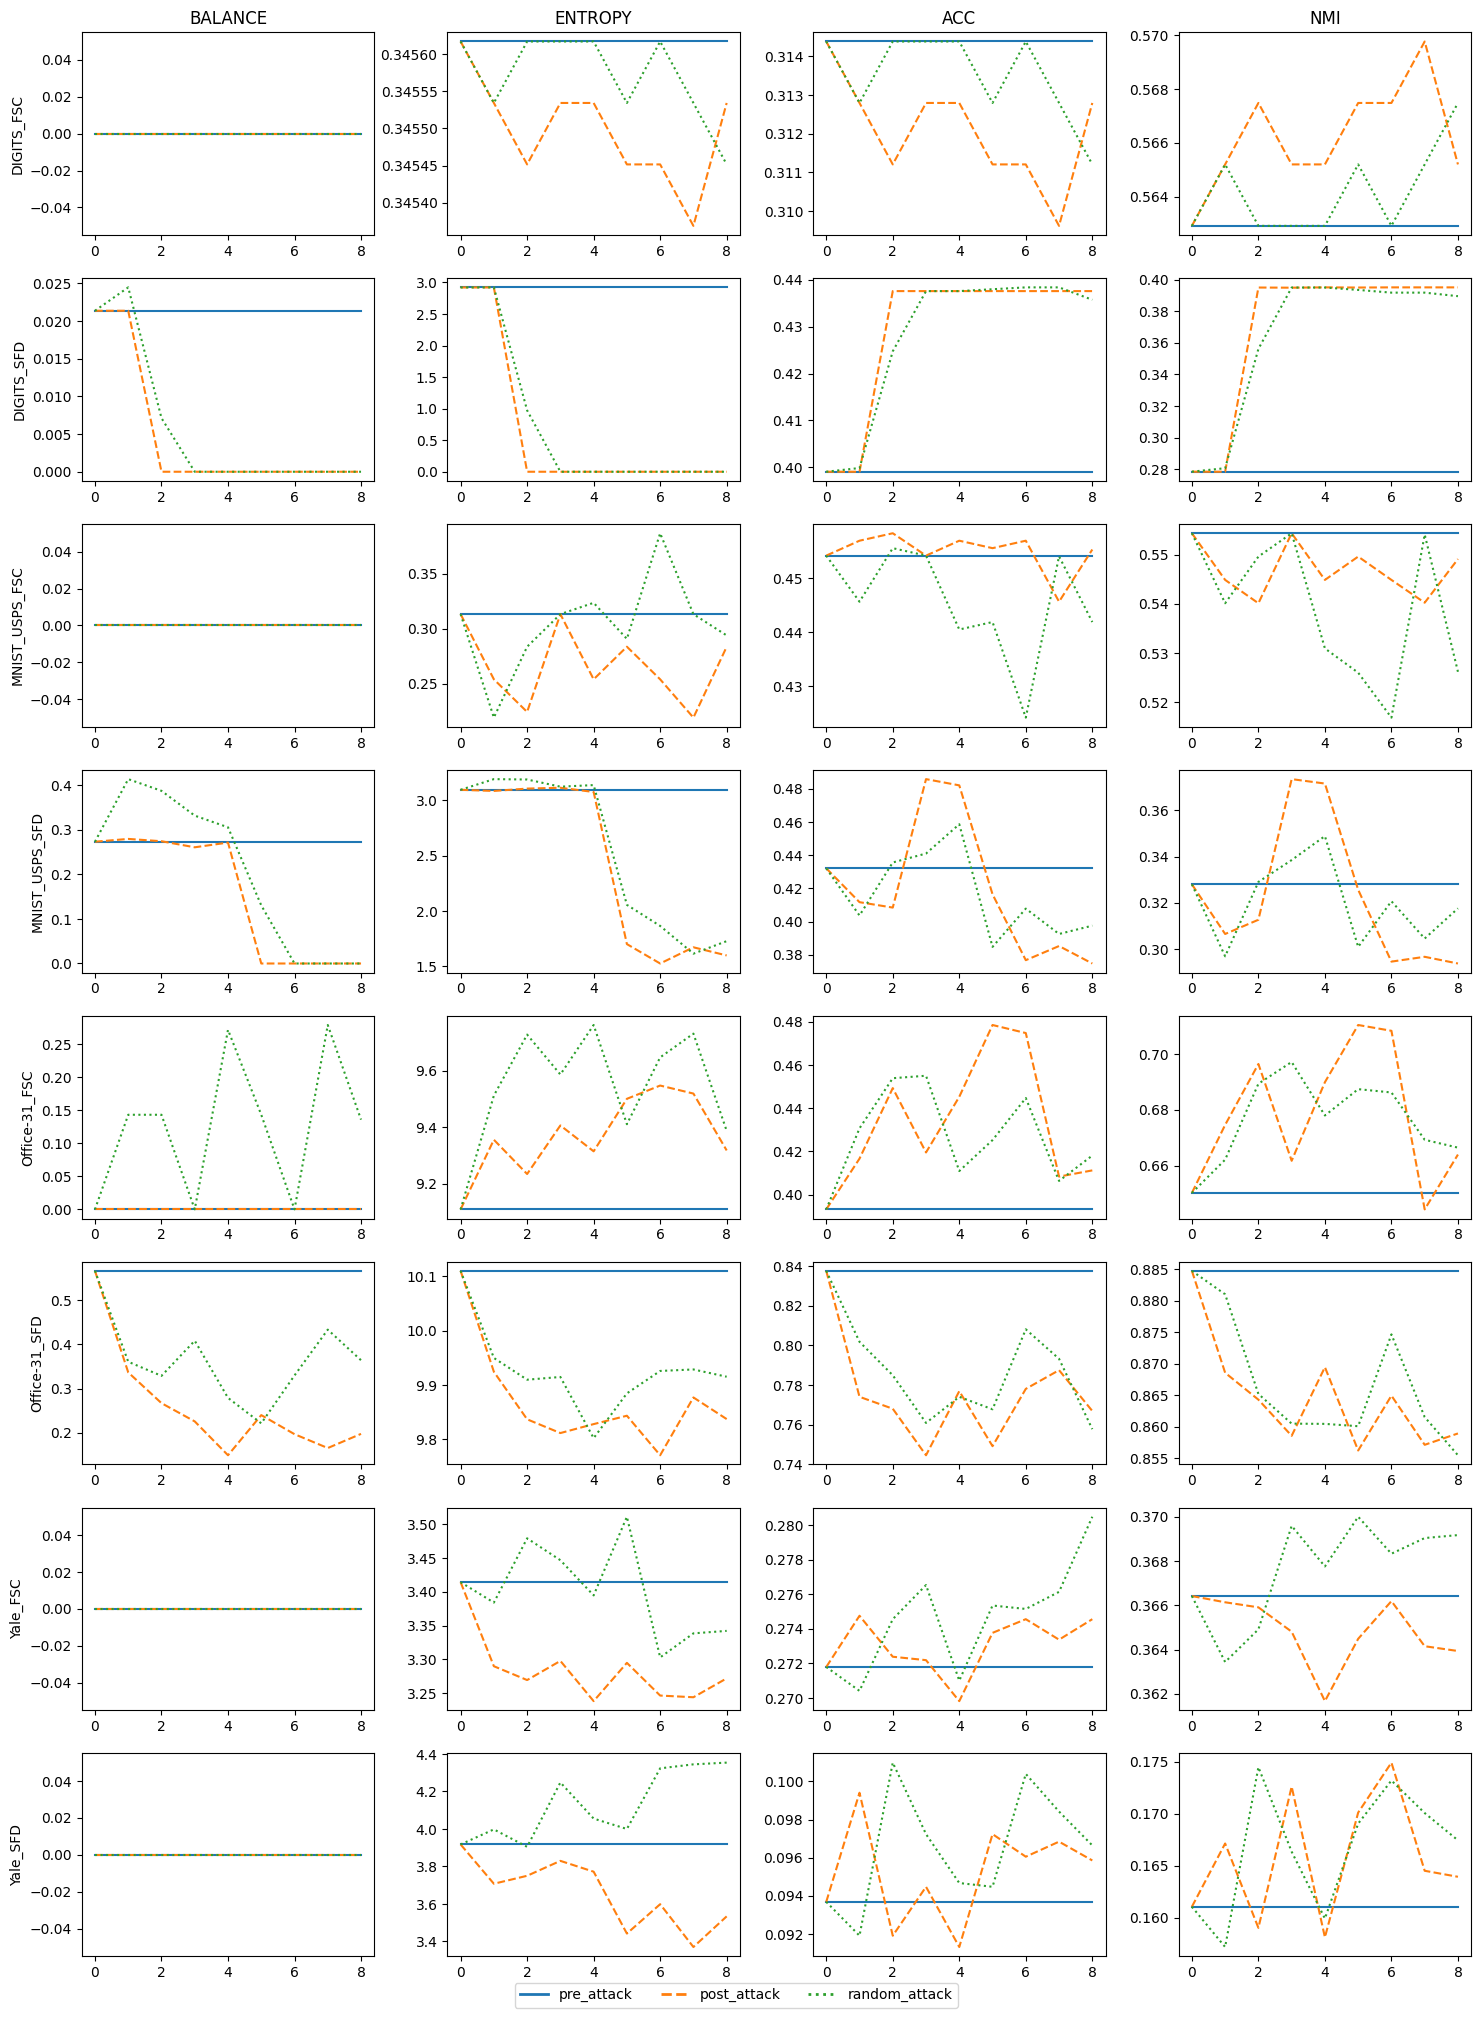

In [51]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Unique datasets and metrics
datasets = ['DIGITS', 'MNIST_USPS', 'Office-31', 'Yale']
subdirs = ['FSC', 'SFD']
metrics = ['BALANCE', 'ENTROPY', 'ACC', 'NMI']
attacks = ['pre_attack', 'post_attack', 'random_attack']

line_styles = ['-', '--', ':']

fig, axs = plt.subplots(len(datasets)*len(subdirs), len(metrics), figsize=(15, 20))  # Create a grid of rows and columns
axs = axs.flatten()  # Flatten the array of axes to make it easier to iterate over

for i, dataset in enumerate(datasets):
    for j, subdir in enumerate(subdirs):
        for k, metric in enumerate(metrics):
            ax = axs[i*len(subdirs)*len(metrics) + j*len(metrics) + k]  # Select the current axis
            for l, attack in enumerate(attacks):
            # Filter keys for current dataset and subdir
                key = f"{dataset}_{subdir}_{attack}_res.pkl"
                if key in mean_std_data:
                    value = mean_std_data[key]


                    means = [entry[metric][0] for entry in value.values()]  # Extract means
                    #stds = [entry[metric][1] for entry in value.values()]  # Extract standard deviations
                    #ax.errorbar(range(len(means)), means, yerr=stds, label=attack)
                    ax.plot(range(len(means)), means, line_styles[l], label=attack)


                if k == 0:
                    ax.set_ylabel(f"{dataset}_{subdir}")
                if i == 0 and j == 0:
                    ax.set_title(metric)

lines = [Line2D([0], [0], color=plt.cm.get_cmap('tab10')(i), linewidth=2, linestyle=line_styles[i]) for i in range(len(attacks))]
fig.legend(lines, attacks, loc='lower center', ncol=len(attacks), bbox_to_anchor=(0.5, -0.01))
plt.tight_layout()
plt.show()